In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import os
import numpy as np

from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Source Sans Pro']})
rc('text', usetex=True)
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

from package.helpers import test_physical_lens
from package.plots import plot, diagnostic_plot

In [3]:
figure_dir = os.path.join(repo_path, 'figures', 'diagnostics', 'pixel_density_test')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

lens = test_physical_lens.TestPhysicalLens()
model = lens.get_array(num_pix=45)
lenstronomy_sim, rgb_image, coords = lens.get_roman_sim()

In [4]:
pandeia_sim = np.load(os.path.join(array_dir, 'detector_1.npy'))
# pandeia_sim = np.load(os.path.join(array_dir, 'detector_3.npy'))
# pandeia_sim = np.load(os.path.join(array_dir, 'detector_5.npy'))
# pandeia_sim = np.load(os.path.join(array_dir, 'detector_7.npy'))
# pandeia_sim = np.load(os.path.join(array_dir, 'detector_9.npy'))

First, a visual comparison

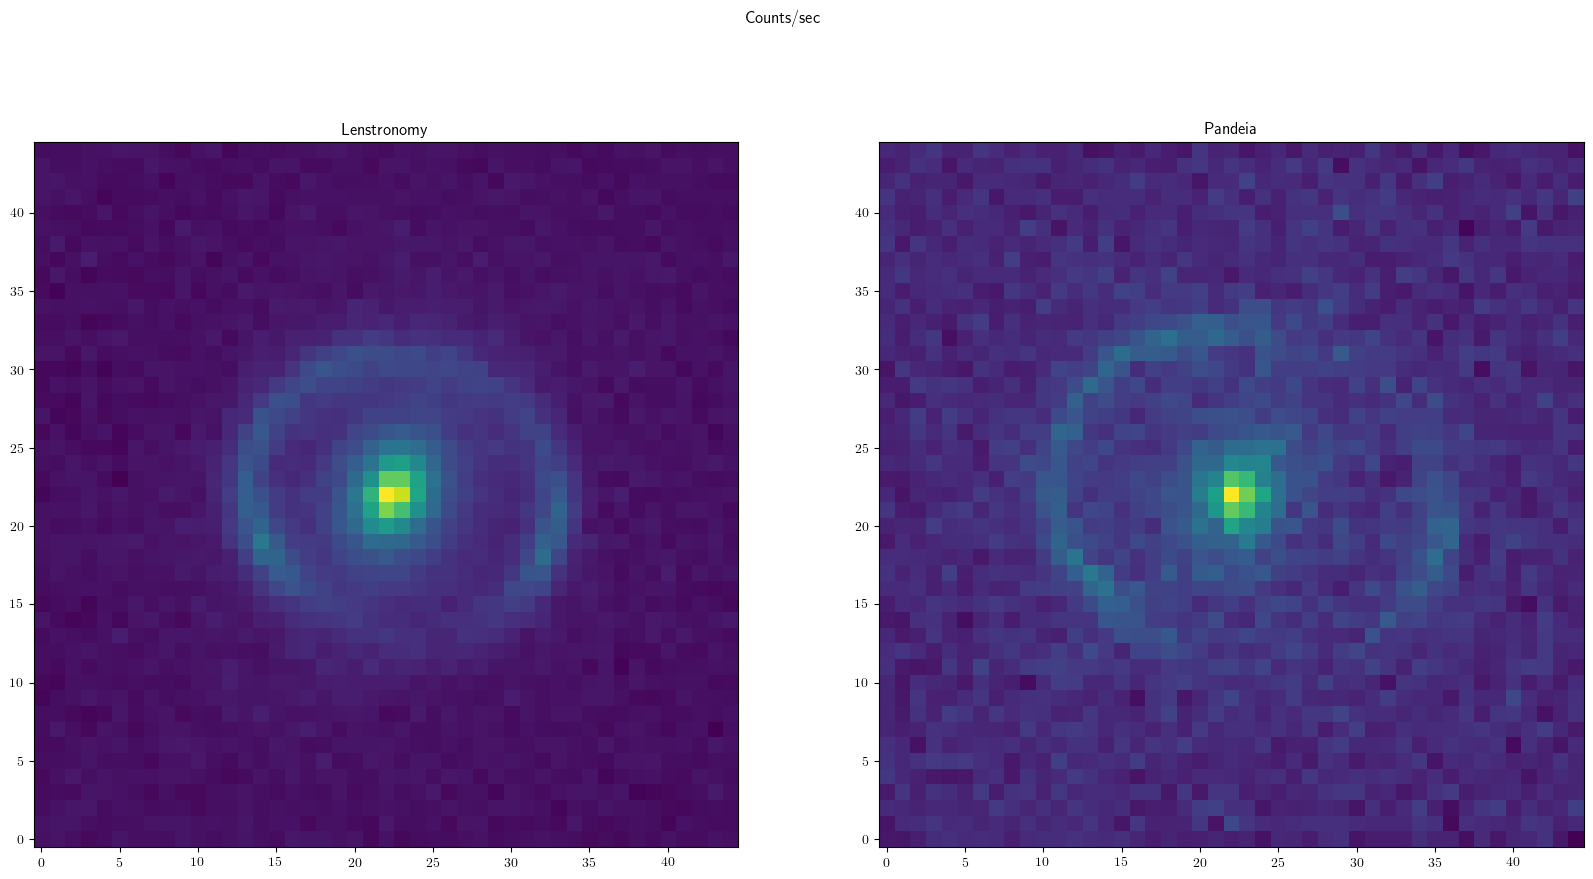

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1.imshow(lenstronomy_sim)
ax2.imshow(pandeia_sim)
ax1.set_title('Lenstronomy')
ax2.set_title('Pandeia')
plt.suptitle('Counts/sec')
plt.show()

/tmp/ipykernel_17371/2063191000.py:2: RuntimeWarning: invalid value encountered in log10
  ax1.imshow(np.log10(lenstronomy_sim))


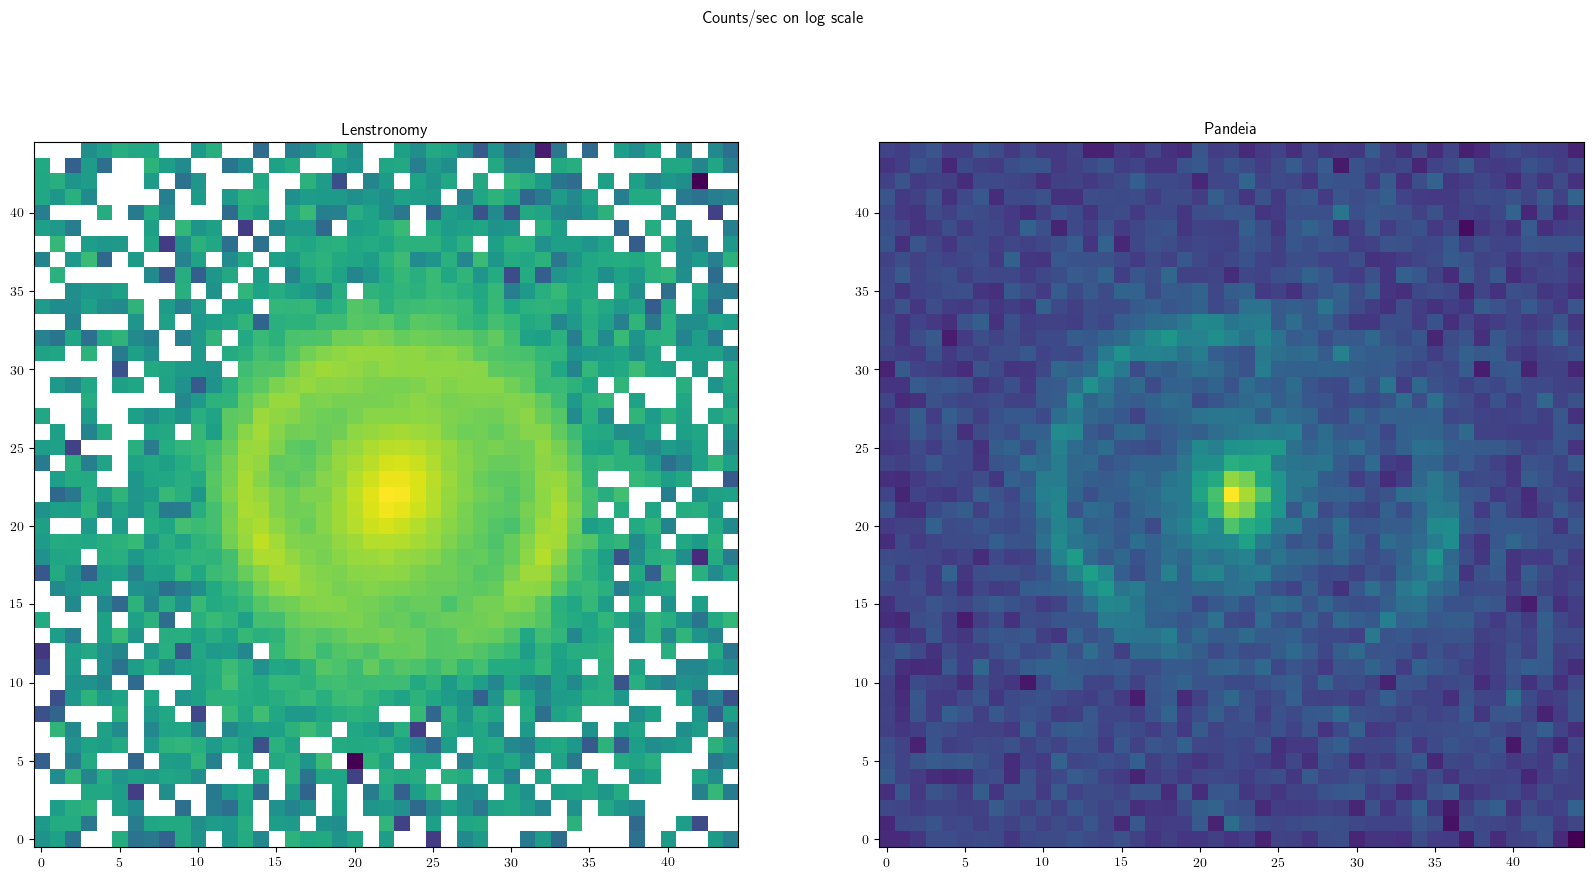

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1.imshow(np.log10(lenstronomy_sim))
ax2.imshow(np.log10(pandeia_sim))
ax1.set_title('Lenstronomy')
ax2.set_title('Pandeia')
plt.suptitle('Counts/sec on log scale')
plt.show()

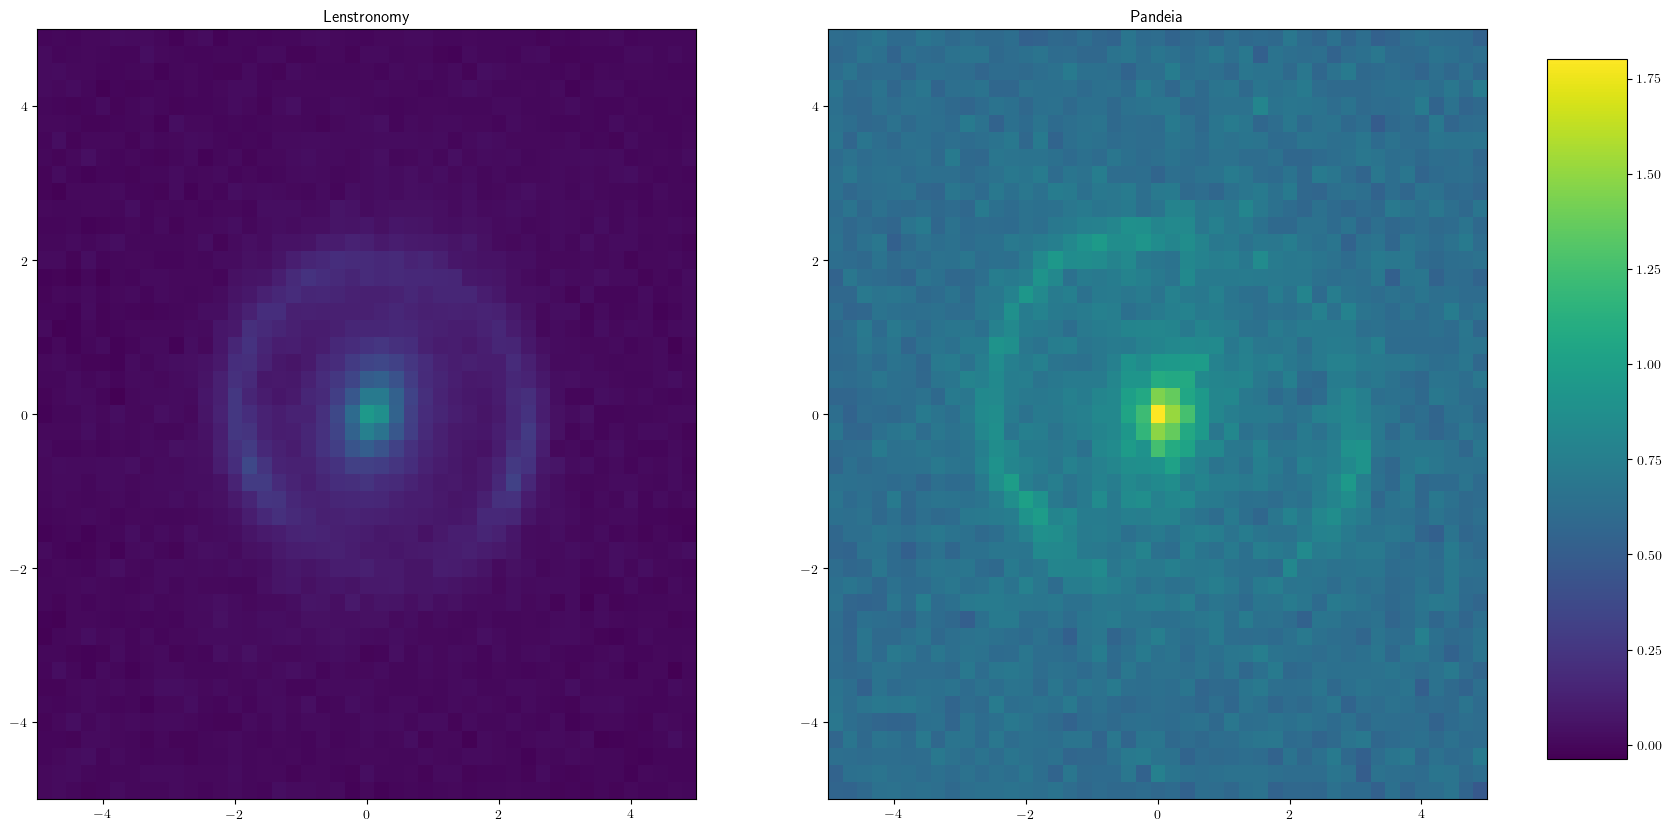

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

min = np.min([np.min(lenstronomy_sim), np.min(pandeia_sim)])
max = np.max([np.max(lenstronomy_sim), np.max(pandeia_sim)])

im1 = axes[0].imshow(lenstronomy_sim, vmin=min, vmax=max,
                     extent=(-5,5,-5,5), aspect='auto', cmap='viridis')
im2 = axes[1].imshow(pandeia_sim, vmin=min, vmax=max,
                     extent=(-5,5,-5,5), aspect='auto', cmap='viridis')

# add space for colour bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im2, cax=cbar_ax)


axes[0].set_title('Lenstronomy')
axes[1].set_title('Pandeia')
plt.show()

Residual plots

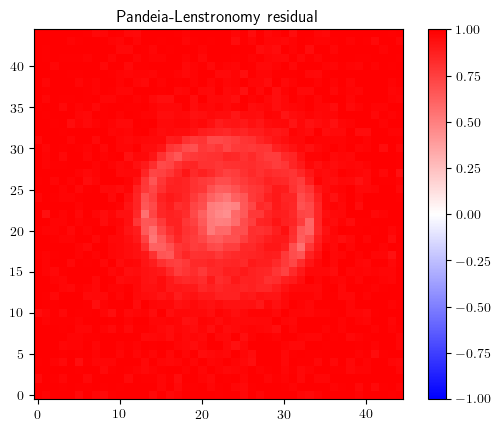

In [ ]:
diagnostic_plot.residual(filepath=None, title='Pandeia-Lenstronomy residual', array1=pandeia_sim, array2=lenstronomy_sim, vmin=-1, vmax=1)

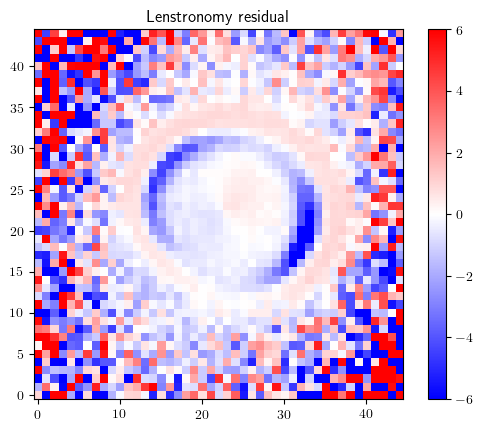

In [ ]:
diagnostic_plot.residual(filepath=None, title='Lenstronomy residual', array1=model, array2=lenstronomy_sim)

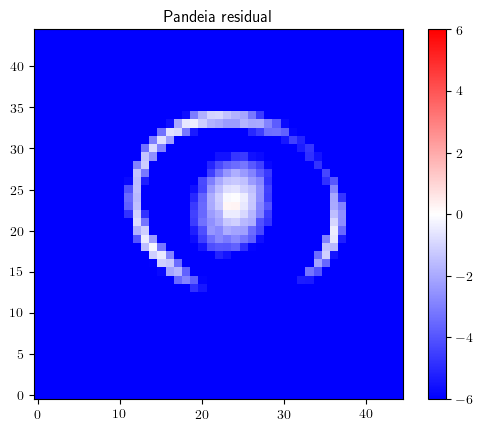

In [ ]:
diagnostic_plot.residual(filepath=None, title='Pandeia residual', array1=model, array2=pandeia_sim)

Do linear interpolation of model lens so that min and max of model and simulation line up, then take residual so we see what artifacts are introduced

In [ ]:
model_max = np.max(model)
model_min = np.min(model)

lenstronomy_max = np.max(lenstronomy_sim)
lenstronomy_min = np.max(lenstronomy_sim)

pandeia_max = np.max(pandeia_sim)
pandeia_min = np.min(pandeia_sim)

lenstronomy_sim_interp = np.interp(lenstronomy_sim, (lenstronomy_min, lenstronomy_max), (model_min, model_max))
pandeia_sim_interp = np.interp(pandeia_sim, (pandeia_min, pandeia_max), (model_min, model_max))

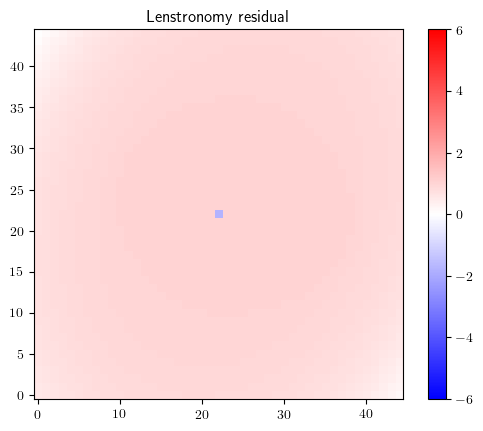

In [ ]:
diagnostic_plot.residual(filepath=None, title='Lenstronomy residual', array1=model, array2=lenstronomy_sim_interp)

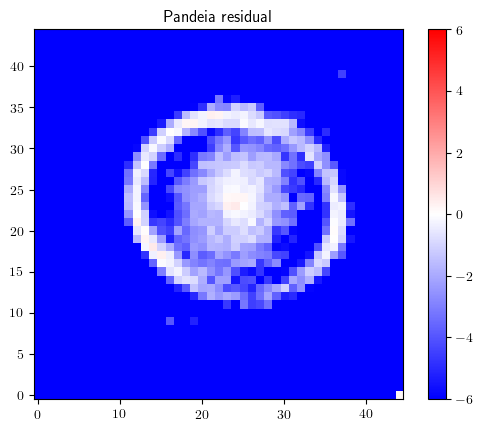

In [ ]:
diagnostic_plot.residual(filepath=None, title='Pandeia residual', array1=model, array2=pandeia_sim_interp)